# Exploring NYC taxi trip in 2015 
### Using approx. 2.8 mil records for train set and 1.4 mil records for test set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import gc

plt.style.use('seaborn')

#matplotlib.style.available

# magic function for plots
%matplotlib inline 

# Geodesic dist are calculated beforehand in another notebook to save time for calculation
# Only included data points with Latitude within 40.5 to 41 and Longitude within -74.25 to -73.65
train = pd.read_csv('train_geo_dist.csv') 
test = pd.read_csv('test_geo_dist.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x) # setting display decimals for float data
pd.set_option('display.max_columns', 50) # displaying max 30 columns

### Limit pickup and dropoff locations within NYC

In [2]:
longLim = [-74.2, -73.68] 
latLim  = [40.55, 40.92]

train = train[(train['pickup_longitude'] >= longLim[0]) & (train['pickup_longitude'] <= longLim[1])]
train = train[(train['dropoff_longitude'] >= longLim[0]) & (train['dropoff_longitude'] <= longLim[1])]
train = train[(train['pickup_latitude'] >= latLim[0]) & (train['pickup_latitude'] <= latLim[1])]
train = train[(train['dropoff_latitude'] >= latLim[0]) & (train['dropoff_latitude'] <= latLim[1])]
train = train.reset_index(drop=True)

In [3]:
train.shape

(2883291, 20)

In [4]:
test.shape

(1420665, 20)

In [5]:
train.head(5)

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,geo_dist
0,1.000,2,40.756,-73.992,0.000,12.500,0.300,0.500,1,2,40.739,-73.977,N,0.000,0.000,13.300,2015-01-30 08:47:45,2015-01-30 08:29:43,1.840,1.361
1,1.000,1,40.757,-73.970,1.000,14.500,0.300,0.500,1,2,40.781,-73.984,N,0.000,0.000,16.300,2015-01-20 16:22:23,2015-01-20 16:00:48,2.400,1.744
2,1.000,1,40.773,-73.965,0.500,4.000,0.300,0.500,1,2,40.770,-73.958,N,0.000,0.000,5.300,2015-01-10 20:04:19,2015-01-10 20:01:33,0.500,0.426
3,1.000,1,40.837,-73.943,0.500,24.500,0.300,0.500,3,1,40.739,-74.000,N,5.200,0.000,31.000,2015-01-08 02:22:38,2015-01-08 02:01:12,8.000,7.405
4,1.000,1,40.741,-73.993,0.000,7.500,0.300,0.500,1,1,40.744,-73.977,N,1.650,0.000,9.950,2015-01-31 12:26:52,2015-01-31 12:18:10,1.200,0.860


In [6]:
train.describe()

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,trip_distance,geo_dist
count,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000,2883291.000
mean,1.035,1.529,40.751,-73.974,0.315,12.832,0.298,0.498,1.686,1.378,40.751,-73.974,1.694,0.306,15.945,2.369,2.141
std,0.453,0.499,0.032,0.035,0.363,10.525,0.023,0.034,1.339,0.499,0.028,0.038,2.432,1.664,12.931,26357.314,2.398
min,1.000,1.000,40.551,-74.200,-45.660,-120.000,-0.300,-1.000,0.000,1.000,40.556,-74.200,-19.080,-15.000,-120.800,-40840124.400,0.000
25%,1.000,1.000,40.736,-73.991,0.000,6.500,0.300,0.500,1.000,1.000,40.737,-73.992,0.000,0.000,8.750,1.010,0.778
50%,1.000,2.000,40.754,-73.980,0.000,9.500,0.300,0.500,1.000,1.000,40.754,-73.982,1.160,0.000,11.800,1.720,1.327
75%,1.000,2.000,40.769,-73.964,0.500,14.500,0.300,0.500,2.000,2.000,40.768,-73.968,2.300,0.000,17.800,3.200,2.450
max,99.000,2.000,40.920,-73.680,19.000,999.990,0.300,2.380,9.000,4.000,40.920,-73.681,350.000,905.500,1000.290,11800005.200,28.026


In [7]:
test.head(5)

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,geo_dist
0,1.000,1,40.782,-73.972,0.000,5.000,0.300,0.500,1,2,40.789,-73.967,N,0.000,0.000,5.800,2015-01-09 12:58:40,2015-01-09 12:54:55,0.500,0.561
1,1.000,1,40.720,-73.945,0.500,12.500,0.300,0.500,1,1,40.724,-73.993,N,2.000,0.000,15.800,2015-01-13 23:19:17,2015-01-13 23:09:04,3.600,2.483
2,1.000,1,40.721,-73.995,0.000,14.500,0.300,0.500,2,2,40.749,-73.992,N,0.000,0.000,15.300,2015-01-25 17:37:55,2015-01-25 17:17:28,2.300,1.919
3,1.000,2,40.737,-73.998,0.000,4.500,0.300,0.500,1,1,40.734,-73.990,N,1.700,0.000,7.000,2015-01-17 18:16:01,2015-01-17 18:11:48,0.480,0.471
4,1.000,2,40.724,-73.847,1.000,17.500,0.300,0.500,1,1,40.769,-73.863,N,3.860,0.000,23.160,2015-01-29 18:51:13,2015-01-29 18:36:44,5.620,3.178


In [8]:
test.describe()

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,trip_distance,geo_dist
count,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000,1420665.000
mean,1.035,1.529,40.751,-73.974,0.315,12.847,0.298,0.498,1.686,1.378,40.751,-73.974,1.693,0.307,15.965,12.560,2.143
std,0.353,0.499,0.032,0.035,0.362,12.466,0.023,0.062,1.339,0.499,0.028,0.038,2.435,1.775,15.561,10153.790,2.406
min,1.000,1.000,40.503,-74.249,-1.000,-230.000,-0.300,-0.500,0.000,1.000,40.526,-74.243,-5.000,-5.540,-230.800,0.000,0.000
25%,1.000,1.000,40.736,-73.991,0.000,6.500,0.300,0.500,1.000,1.000,40.737,-73.992,0.000,0.000,8.750,1.010,0.778
50%,1.000,2.000,40.754,-73.980,0.000,9.500,0.300,0.500,1.000,1.000,40.754,-73.982,1.160,0.000,11.800,1.730,1.327
75%,1.000,2.000,40.769,-73.963,0.500,14.500,0.300,0.500,2.000,2.000,40.768,-73.968,2.300,0.000,17.800,3.200,2.449
max,99.000,2.000,40.999,-73.650,23.000,8010.000,0.300,58.880,7.000,4.000,40.999,-73.650,306.550,805.090,8010.800,12000001.500,27.935


In [9]:
train.isnull().sum()

RateCodeID               0
VendorID                 0
dropoff_latitude         0
dropoff_longitude        0
extra                    0
fare_amount              0
improvement_surcharge    0
mta_tax                  0
passenger_count          0
payment_type             0
pickup_latitude          0
pickup_longitude         0
store_and_fwd_flag       0
tip_amount               0
tolls_amount             0
total_amount             0
tpep_dropoff_datetime    0
tpep_pickup_datetime     0
trip_distance            0
geo_dist                 0
dtype: int64

In [10]:
test.isnull().sum()

RateCodeID               0
VendorID                 0
dropoff_latitude         0
dropoff_longitude        0
extra                    0
fare_amount              0
improvement_surcharge    0
mta_tax                  0
passenger_count          0
payment_type             0
pickup_latitude          0
pickup_longitude         0
store_and_fwd_flag       0
tip_amount               0
tolls_amount             0
total_amount             0
tpep_dropoff_datetime    0
tpep_pickup_datetime     0
trip_distance            0
geo_dist                 0
dtype: int64

### Features creation

In [11]:
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])
train['trip_duration'] = train['tpep_dropoff_datetime'] - train['tpep_pickup_datetime']
train['trip_duration'] = train['trip_duration'].dt.total_seconds()
train['duration [min]'] = train['trip_duration'] / 60.0

In [12]:
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])
test['trip_duration'] = test['tpep_dropoff_datetime'] - test['tpep_pickup_datetime']
test['trip_duration'] = test['trip_duration'].dt.total_seconds()
test['duration [min]'] = test['trip_duration'] / 60.0

In [13]:
#train = train.dropna(axis=0).reset_index(drop=True)

### Getting some ideas of extreme values

In [14]:
print(np.percentile(train['trip_duration'],1))
print(np.percentile(train['trip_duration'],99))
print(np.percentile(train['trip_distance'],1))
print(np.percentile(train['trip_distance'],99))

88.0
3402.0
0.23
18.5


In [15]:
# Anomalies in trip duration
print('Anomalies in trip duration {:.2f} % '
    .format(train[(train['trip_duration'] < 60) | (train['trip_duration'] > 7200)].shape[0] / train.shape[0] * 100))

Anomalies in trip duration 0.68 % 


In [16]:
# Anomalies in trip distance
print('Anomalies in trip distance {:.2f} % '
    .format(train[(train['trip_distance'] < 0.1) | (train['trip_distance'] > 25)].shape[0] / train.shape[0] * 100))

Anomalies in trip distance 0.57 % 


### Limit trip duration >= 1 min and <= 3 hrs | trip distance in miles <= 25 miles

In [17]:
train = train[(train['trip_duration'] >= 60) & (train['trip_duration'] <= 7200)].reset_index(drop=True)
train = train[(train['trip_distance'] >= 0.1) & (train['trip_distance'] <= 25)].reset_index(drop=True)
train = train[(train['passenger_count'] > 0) & (train['fare_amount'] > 0)].reset_index(drop=True)

In [18]:
test = test[(test['trip_duration'] >= 60) & (test['trip_duration'] <= 7200)].reset_index(drop=True)
test = test[(test['trip_distance'] >= 0.1) & (test['trip_distance'] <= 25)].reset_index(drop=True)
test = test[(test['passenger_count'] > 0) & (test['fare_amount'] > 0)].reset_index(drop=True)

### Deal with negative fare 

In [19]:
labels = ['extra', 'fare_amount', 'improvement_surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']

for column in labels:
    train[column] = train[column].abs()
    test[column] = test[column].abs()   

In [20]:
train = train[train['total_amount'] == 
              train['extra'] + train['fare_amount'] + train['improvement_surcharge'] 
              + train['mta_tax'] + train['tip_amount'] + train['tolls_amount']].reset_index(drop=True)

test = test[test['total_amount'] == 
              test['extra'] + test['fare_amount'] + test['improvement_surcharge'] 
              + test['mta_tax'] + test['tip_amount'] + test['tolls_amount']].reset_index(drop=True)


### Creating speed features

In [21]:
train['speed_taximeter [miles/hr]'] = train['trip_distance'] / (train['duration [min]'] / 60.0)
train['speed_taximeter [km/hr]'] = train['trip_distance'] * 1.609344 / (train['duration [min]'] / 60.0)

test['speed_taximeter [miles/hr]'] = test['trip_distance'] / (test['duration [min]'] / 60.0)
test['speed_taximeter [km/hr]'] = test['trip_distance'] * 1.609344 / (test['duration [min]'] / 60.0)


### Take log form of trip duration and fare amount (for target of prediction)

In [22]:
train['log_trip_duration'] = np.log(train['trip_duration']+1)
test['log_trip_duration'] = np.log(test['trip_duration']+1)
train['log_fare_amount'] = np.log(train['fare_amount']+1)
test['log_fare_amount'] = np.log(test['fare_amount']+1)

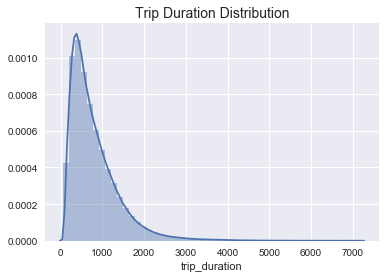

In [23]:
sns.distplot(train['trip_duration'])
plt.title("Trip Duration Distribution", fontsize=14)
plt.show()

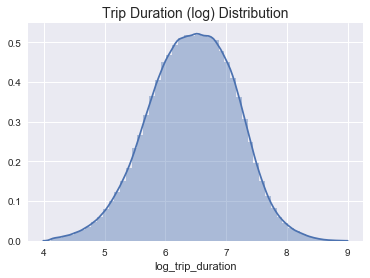

In [24]:
sns.distplot(train['log_trip_duration'])
plt.title("Trip Duration (log) Distribution", fontsize=14)
plt.show()

### Creating cost per mile

In [25]:
train['cost [mile]'] = train['fare_amount'] / train['trip_distance']
test['cost [mile]'] = test['fare_amount'] / test['trip_distance']

In [26]:
train['cost [mile]'].describe()

count   2490515.000
mean          5.944
std           5.727
min           0.000
25%           4.255
50%           5.385
75%           6.849
max        3076.923
Name: cost [mile], dtype: float64

In [27]:
np.percentile(train['cost [mile]'],99)

15.0

In [28]:
train[train['cost [mile]'] >15].head(10)

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,geo_dist,trip_duration,duration [min],speed_taximeter [miles/hr],speed_taximeter [km/hr],log_trip_duration,log_fare_amount,cost [mile]
23,1.000,1,40.750,-73.981,0.000,8.500,0.300,0.500,1,1,40.748,-73.974,N,1.000,0.000,10.300,2015-01-30 11:08:32,2015-01-30 10:56:03,0.400,0.408,749.000,12.483,1.923,3.094,6.620,2.251,21.250
44,1.000,1,40.765,-73.979,0.000,7.500,0.300,0.500,1,2,40.764,-73.974,N,0.000,0.000,8.300,2015-01-28 15:37:18,2015-01-28 15:27:26,0.400,0.275,592.000,9.867,2.432,3.915,6.385,2.140,18.750
404,1.000,1,40.740,-74.003,0.000,4.000,0.300,0.500,1,3,40.740,-74.005,N,0.000,0.000,4.800,2015-01-31 16:07:44,2015-01-31 16:04:52,0.200,0.143,172.000,2.867,4.186,6.737,5.153,1.609,20.000
956,1.000,2,40.730,-73.983,0.000,4.000,0.300,0.500,2,2,40.732,-73.985,N,0.000,0.000,4.800,2015-01-26 12:18:11,2015-01-26 12:15:13,0.260,0.203,178.000,2.967,5.258,8.463,5.187,1.609,15.385
1136,1.000,2,40.763,-73.973,1.000,7.500,0.300,0.500,5,1,40.765,-73.977,N,1.500,0.000,10.800,2015-01-26 16:03:16,2015-01-26 15:52:52,0.270,0.262,624.000,10.400,1.558,2.507,6.438,2.140,27.778
1328,1.000,1,40.778,-73.958,0.000,3.500,0.300,0.500,1,2,40.776,-73.956,N,0.000,0.000,4.300,2015-01-10 17:27:30,2015-01-10 17:25:33,0.200,0.162,117.000,1.950,6.154,9.904,4.771,1.504,17.500
1485,1.000,2,40.750,-73.992,0.500,3.500,0.300,0.500,3,2,40.752,-73.990,N,0.000,0.000,4.800,2015-01-28 20:04:29,2015-01-28 20:01:45,0.110,0.103,164.000,2.733,2.415,3.886,5.106,1.504,31.818
1615,1.000,2,40.757,-73.986,0.500,5.000,0.300,0.500,1,2,40.755,-73.983,N,0.000,0.000,6.300,2015-01-16 22:32:52,2015-01-16 22:27:51,0.200,0.207,301.000,5.017,2.392,3.850,5.710,1.792,25.000
1633,1.000,1,40.730,-73.998,0.000,3.500,0.300,0.500,1,2,40.731,-74.002,N,0.000,0.000,4.300,2015-01-29 08:58:35,2015-01-29 08:56:38,0.200,0.174,117.000,1.950,6.154,9.904,4.771,1.504,17.500
1828,1.000,1,40.765,-73.955,0.000,8.000,0.300,0.500,1,1,40.768,-73.964,N,1.750,0.000,10.550,2015-01-06 12:16:34,2015-01-06 12:05:30,0.500,0.513,664.000,11.067,2.711,4.363,6.500,2.197,16.000


### Drop records with unreasonable cost per mile

In [29]:
train = train[train['cost [mile]'] < 15].reset_index(drop=True)
test = test[test['cost [mile]'] < 15].reset_index(drop=True)

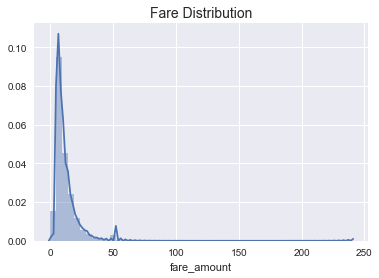

In [30]:
sns.distplot(train['fare_amount'])
plt.title("Fare Distribution", fontsize=14)
plt.show()

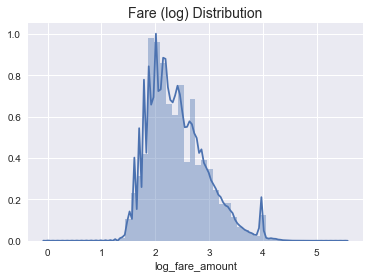

In [31]:
sns.distplot(train['log_fare_amount'])
plt.title("Fare (log) Distribution", fontsize=14)
plt.show()

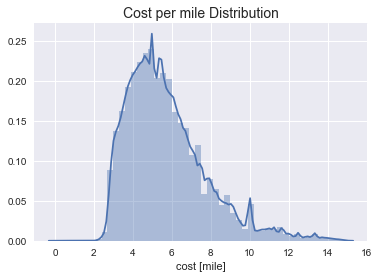

In [32]:
sns.distplot(train['cost [mile]'])
plt.title("Cost per mile Distribution", fontsize=14)
plt.show()

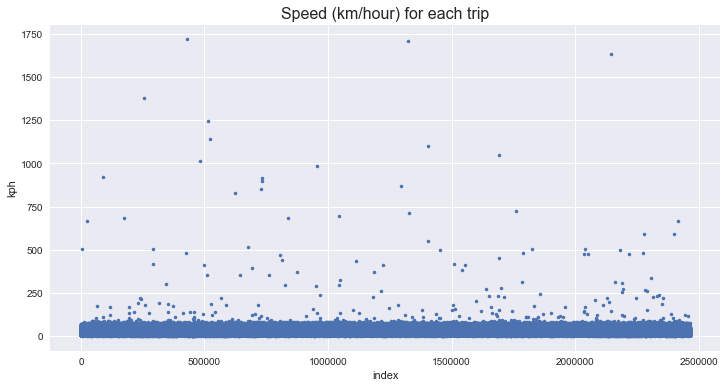

In [33]:
# Graph to show anomalies in speed

kph = train['speed_taximeter [km/hr]'].values
plt.subplots(figsize = (12,6))
plt.title("Speed (km/hour) for each trip", fontsize=16)
plt.plot(range(len(kph)),kph,'.')
plt.ylabel('kph')
plt.xlabel('index')
plt.show()

In [34]:
# Anomalies in speed
print('Anomalies in trip distance {:.2f} % '
    .format(train[(train['speed_taximeter [km/hr]'] < 1) | (train['speed_taximeter [km/hr]'] > 50)].shape[0] / train.shape[0] * 100))

Anomalies in trip distance 1.44 % 


### Limit speed <= 50 km/hour

In [35]:
train = train[(train['speed_taximeter [km/hr]'] >= 1) & (train['speed_taximeter [km/hr]'] <= 50)].reset_index(drop=True)
test = test[(test['speed_taximeter [km/hr]'] >= 1) & (test['speed_taximeter [km/hr]'] <= 50)].reset_index(drop=True)

In [36]:
#train[train.isnull().any(axis=1)]

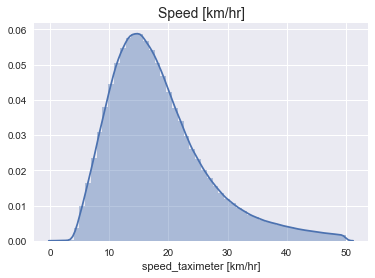

In [37]:
sns.distplot(train['speed_taximeter [km/hr]'])
plt.title("Speed [km/hr]", fontsize=14)
plt.show()

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427307 entries, 0 to 2427306
Data columns (total 27 columns):
RateCodeID                    float64
VendorID                      int64
dropoff_latitude              float64
dropoff_longitude             float64
extra                         float64
fare_amount                   float64
improvement_surcharge         float64
mta_tax                       float64
passenger_count               int64
payment_type                  int64
pickup_latitude               float64
pickup_longitude              float64
store_and_fwd_flag            object
tip_amount                    float64
tolls_amount                  float64
total_amount                  float64
tpep_dropoff_datetime         datetime64[ns]
tpep_pickup_datetime          datetime64[ns]
trip_distance                 float64
geo_dist                      float64
trip_duration                 float64
duration [min]                float64
speed_taximeter [miles/hr]    float64
speed_

In [39]:
train[train['passenger_count']>6]

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,geo_dist,trip_duration,duration [min],speed_taximeter [miles/hr],speed_taximeter [km/hr],log_trip_duration,log_fare_amount,cost [mile]
696505,1.000,1,40.738,-74.003,0.500,10.500,0.300,0.500,7,1,40.765,-73.992,N,2.350,0.000,14.150,2015-04-05 01:03:43,2015-04-05 00:52:16,2.500,1.969,687.000,11.450,13.100,21.083,6.534,2.442,4.200
1707219,1.000,1,40.759,-73.988,0.000,8.500,0.300,0.500,9,2,40.754,-74.000,N,0.000,0.000,9.300,2015-09-26 13:27:00,2015-09-26 13:15:23,0.900,0.685,697.000,11.617,4.648,7.481,6.548,2.251,9.444


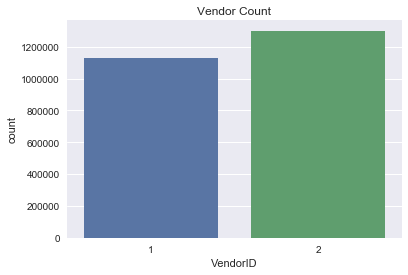

In [40]:
sns.countplot(train['VendorID'])
plt.title("Vendor Count", fontsize=14)
plt.show()

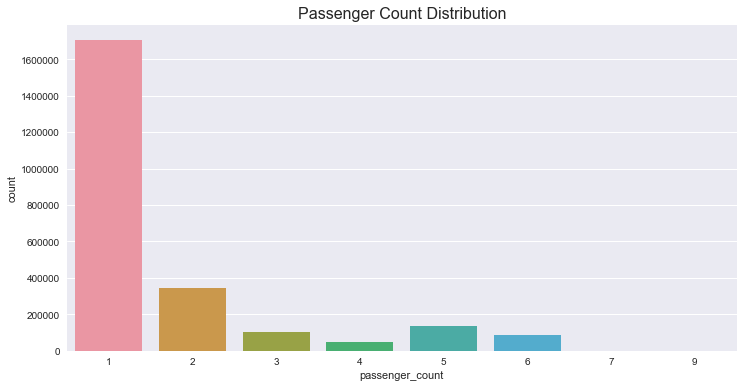

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(train['passenger_count'])
plt.title("Passenger Count Distribution", fontsize=16)
plt.show()

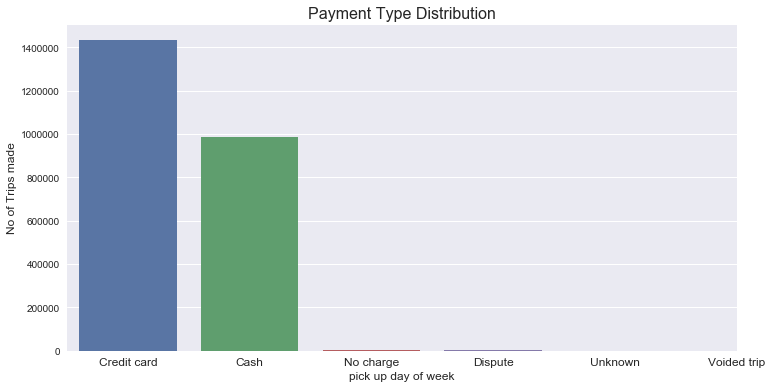

In [42]:
# payment methods for plot mapping
payment = ['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip']

plt.figure(figsize=(12,6))
sns.countplot(train['payment_type'])
plt.title('Payment Type Distribution', fontsize=16)
plt.xlabel('pick up day of week', fontsize=12)
plt.xticks(range(0,6), payment, rotation='horizontal', fontsize=12)
plt.ylabel('No of Trips made',fontsize=12)
plt.show()

In [43]:
# combing all lat and long
allLat  = list(train['pickup_latitude'])  + list(train['dropoff_latitude'])
allLong = list(train['pickup_longitude']) + list(train['dropoff_longitude'])

In [44]:
train = train[train['RateCodeID']<=6].reset_index(drop=True)

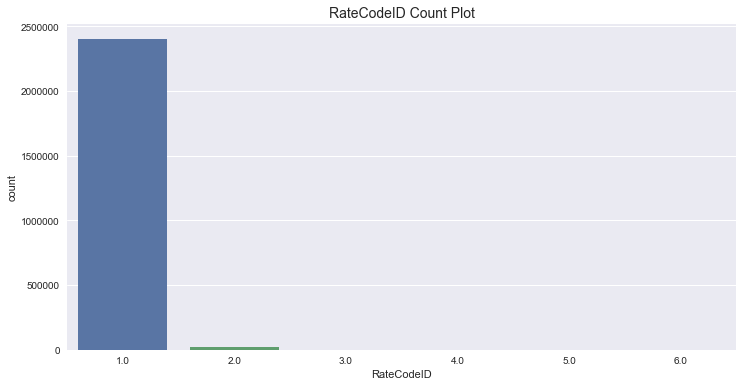

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(train['RateCodeID'])
plt.title("RateCodeID Count Plot", fontsize=14)
plt.show()

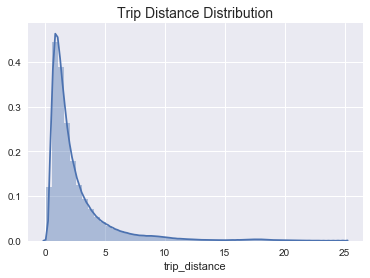

In [46]:
sns.distplot(train['trip_distance'])
plt.title("Trip Distance Distribution", fontsize=14)
plt.show()

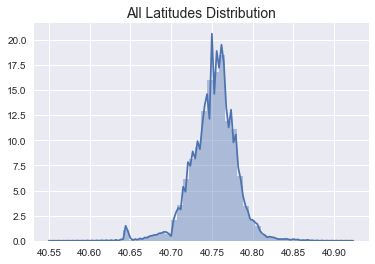

In [47]:
sns.distplot(allLat)
plt.title("All Latitudes Distribution", fontsize=14)
plt.show()

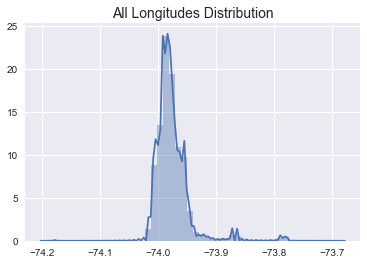

In [48]:
sns.distplot(allLong)
plt.title("All Longitudes Distribution", fontsize=14)
plt.show()

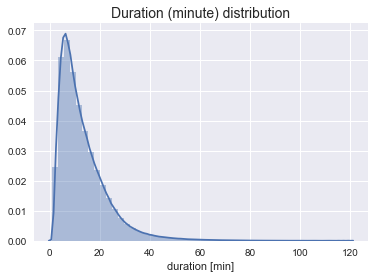

In [49]:
sns.distplot(train['duration [min]'])
plt.title("Duration (minute) distribution", fontsize=14)
plt.show()

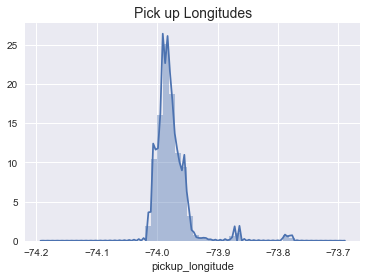

In [50]:
sns.distplot(train['pickup_longitude'])
plt.title("Pick up Longitudes", fontsize=14)
plt.show()

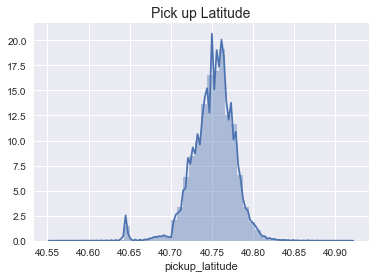

In [51]:
sns.distplot(train['pickup_latitude'])
plt.title("Pick up Latitude", fontsize=14)
plt.show()

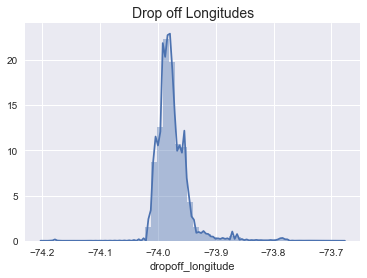

In [52]:
sns.distplot(train['dropoff_longitude'])
plt.title("Drop off Longitudes", fontsize=14)
plt.show()

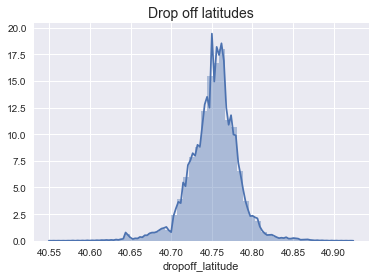

In [53]:
sns.distplot(train['dropoff_latitude'])
plt.title("Drop off latitudes", fontsize=14)
plt.show()

In [54]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [55]:
#matplotlib.style.use('dark_background')
plt.style.use('default')
%matplotlib inline

# Initial plot for all pickups and dropoffs

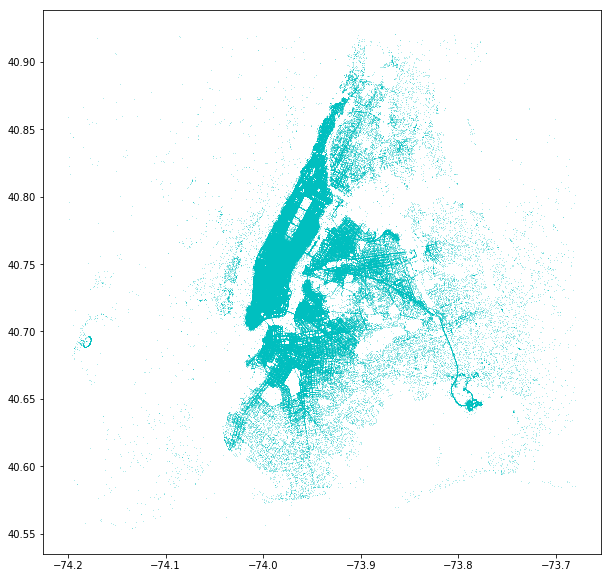

In [151]:
plt.figure(figsize = (10,10))
plt.plot(allLong,allLat,',', alpha = 0.3, markersize = 0.5, c='c')
plt.show()

# Creating density plot for all pickups and dropoffs

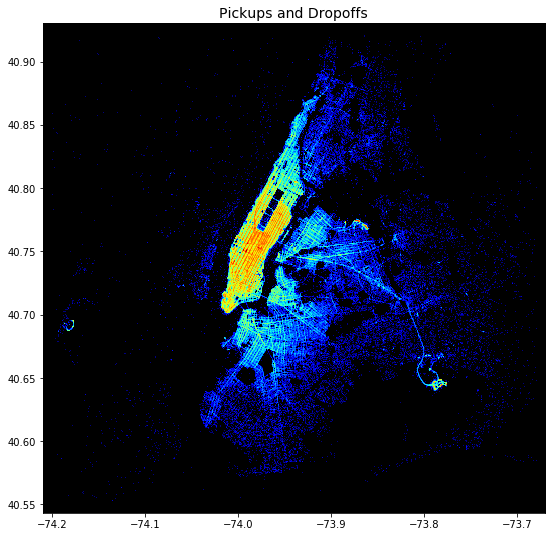

In [57]:
import copy
from matplotlib.colors import LogNorm

lat_min, lat_max, lon_min, lon_max = min(allLat), max(allLat), min(allLong), max(allLong)

cmap = copy.copy(plt.cm.jet) # choose colormap e.g. jet, terrain
cmap.set_bad((0,0,0))  # Fill background with black

# Center the map around the provided center coordinates
histogram_range = [
        [lon_min - 0.01, lon_max + 0.01], # 0.01 is the adjustment on the plot for it to show itself nicely
        [lat_min - 0.01, lat_max + 0.01]
    ]
    
fig = plt.figure(figsize=(9,9))
plt.hist2d(allLong, allLat, bins=500, norm=LogNorm(),
            cmap=cmap, range=histogram_range)

# Remove all axes and annotations to keep the map clean and simple
plt.grid('off')
plt.title("Pickups and Dropoffs", fontsize=14)
#plt.axis('off')
#fig.axes[0].get_xaxis().set_visible(False)
#fig.axes[0].get_yaxis().set_visible(False)
#plt.tight_layout()
plt.show()

# Pick up vs. Drop off locations

In [58]:
pickupLat = list(train['pickup_latitude'])
pickupLong = list(train['pickup_longitude'])
dropoffLat = list(train['dropoff_latitude'])
dropoffLong = list(train['dropoff_longitude'])


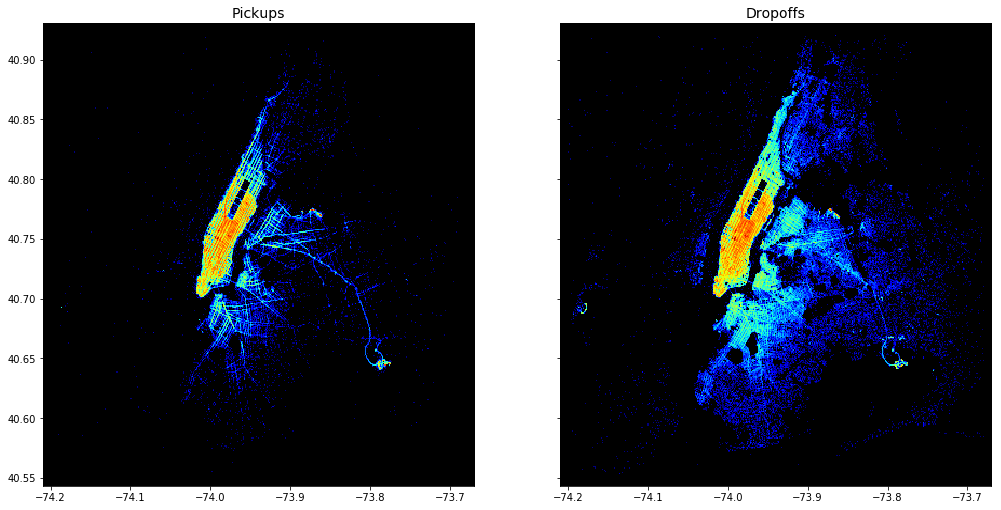

In [59]:
import copy
from matplotlib.colors import LogNorm

lat_min, lat_max, lon_min, lon_max = min(allLat), max(allLat), min(allLong), max(allLong)

cmap = copy.copy(plt.cm.jet) # choose colormap e.g. jet, terrain
cmap.set_bad((0,0,0))  # Fill background with black

# Center the map around the provided center coordinates
histogram_range = [
        [lon_min - 0.01, lon_max + 0.01], # 0.01 is the adjustment on the plot for it to show itself nicely
        [lat_min - 0.01, lat_max + 0.01]
    ]
    
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True,figsize=(17,8.5))
ax1.hist2d(pickupLong, pickupLat, bins=400, norm=LogNorm(),
            cmap=cmap, range=histogram_range)

ax1.set_title("Pickups", fontsize=14)

ax2.hist2d(dropoffLong, dropoffLat, bins=400, norm=LogNorm(),
            cmap=cmap, range=histogram_range)

ax2.set_title("Dropoffs", fontsize=14)
# Remove all axes and annotations to keep the map clean and simple
plt.grid('off')
#plt.axis('off')
#fig.axes[0].get_xaxis().set_visible(False)
#fig.axes[0].get_yaxis().set_visible(False)
#plt.tight_layout()
plt.show()

# Yellow Taxi are exclusively allowed to pick up any trips in the Manhattan exclusionary zone which is forbidden for Boro Taxi (Green Taxi).
![Image of Yellow Taxi](http://www.nyc.gov/html/tlc/images/features/map_service_area_map_thumbnail.jpg)

# Zoom in Manhattan

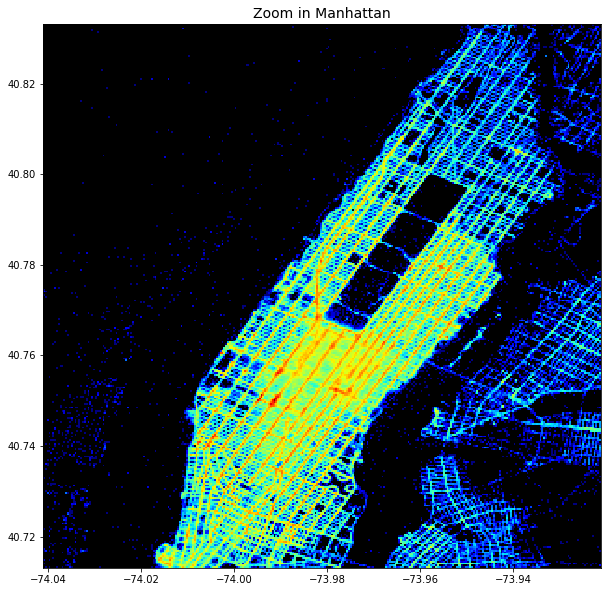

In [60]:
manhattan = [40.7831, -73.9712]
 
cmap = copy.copy(plt.cm.jet) # choose colormap e.g. jet, terrain
cmap.set_bad((0,0,0))  # Fill background with black

# Center the map around the provided center coordinates
histogram_range = [
[manhattan[1] - 0.07, manhattan[1] + 0.05], # 0.1 is the adjustment on the plot for it to show itself nicely
[manhattan[0] - 0.07, manhattan[0] + 0.05]
    ]
    
fig = plt.figure(figsize=(10,10))
plt.hist2d(allLong, allLat, bins=300, norm=LogNorm(),
            cmap=cmap, range=histogram_range)
plt.title('Zoom in Manhattan', fontsize=14)
# Remove all axes and annotations to keep the map clean and simple
plt.grid('off')
#plt.axis('off')
#fig.axes[0].get_xaxis().set_visible(False)
#fig.axes[0].get_yaxis().set_visible(False)
#plt.tight_layout()
plt.show()

In [61]:
pickup = list(zip(pickupLat, pickupLong))[:150]
dropoff = list(zip(dropoffLat, dropoffLong))[:150]

### Creating Map with 150 samples

In [62]:
import folium

mapit = folium.Map(location=[40.730610, -73.935242], zoom_start=11.3)
for coord in pickup:
    folium.CircleMarker(location=[coord[0], coord[1]],
                    radius=3,
                    color='#FF0000',
                    fill_color='#FF0000'
                   ).add_to(mapit)
for coord in dropoff:
    folium.CircleMarker(location=[coord[0], coord[1]],
                    radius=3,
                    color='#3186cc',
                    fill_color='#3186cc'
                   ).add_to(mapit)
mapit

In [63]:
mapit.save('map.html')

### Creating Time variables

In [64]:
train['pickup_month'] = train['tpep_pickup_datetime'].dt.month
train['pickup_day'] = train['tpep_pickup_datetime'].dt.day
train['pickup_hour'] = train['tpep_pickup_datetime'].dt.hour
train['pickup_minute'] = train['tpep_pickup_datetime'].dt.minute
train['pickup_weekofyear'] = train['tpep_pickup_datetime'].dt.weekofyear
train['pickup_day_week'] = train['tpep_pickup_datetime'].dt.weekday
train['pickup_time'] = train['pickup_hour'] + train['pickup_minute'] / 60.0

In [65]:
train['dropoff_month'] = train['tpep_dropoff_datetime'].dt.month
train['dropoff_hour'] = train['tpep_dropoff_datetime'].dt.hour
train['dropoff_day_week'] = train['tpep_dropoff_datetime'].dt.weekday

In [66]:
test['pickup_month'] = test['tpep_pickup_datetime'].dt.month
test['pickup_day'] = test['tpep_pickup_datetime'].dt.day
test['pickup_hour'] = test['tpep_pickup_datetime'].dt.hour
test['pickup_minute'] = test['tpep_pickup_datetime'].dt.minute
test['pickup_weekofyear'] = test['tpep_pickup_datetime'].dt.weekofyear
test['pickup_day_week'] = test['tpep_pickup_datetime'].dt.weekday
test['pickup_time'] = test['pickup_hour'] + test['pickup_minute'] / 60.0

In [67]:
test['dropoff_month'] = test['tpep_dropoff_datetime'].dt.month
test['dropoff_hour'] = test['tpep_dropoff_datetime'].dt.hour
test['dropoff_day_week'] = test['tpep_dropoff_datetime'].dt.weekday

In [68]:
plt.style.use('seaborn')
%matplotlib inline

In [69]:
# dow names for plot mapping
dow_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
# mm names for plot mapping
mm_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

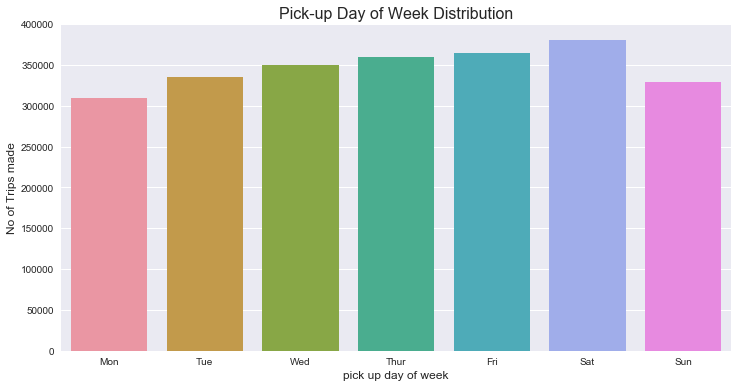

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(train['pickup_day_week'])
plt.title('Pick-up Day of Week Distribution', fontsize=16)
plt.xlabel('pick up day of week', fontsize=12)
plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made',fontsize=12)
plt.show()

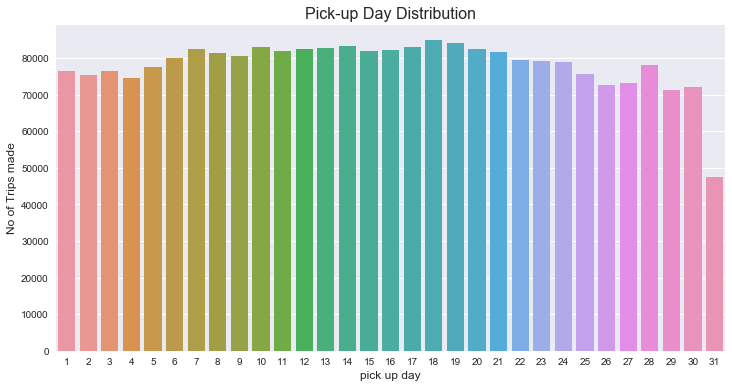

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(train['pickup_day'])
plt.title('Pick-up Day Distribution', fontsize=16)
plt.xlabel('pick up day', fontsize=12)
#plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made',fontsize=12)
plt.show()

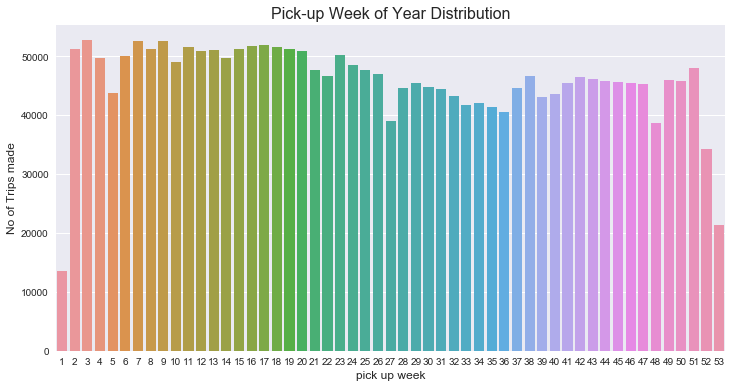

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(train['pickup_weekofyear'])
plt.title('Pick-up Week of Year Distribution', fontsize=16)
plt.xlabel('pick up week', fontsize=12)
#plt.xticks(range(0,7), dow_names, rotation='horizontal')
plt.ylabel('No of Trips made',fontsize=12)
plt.show()

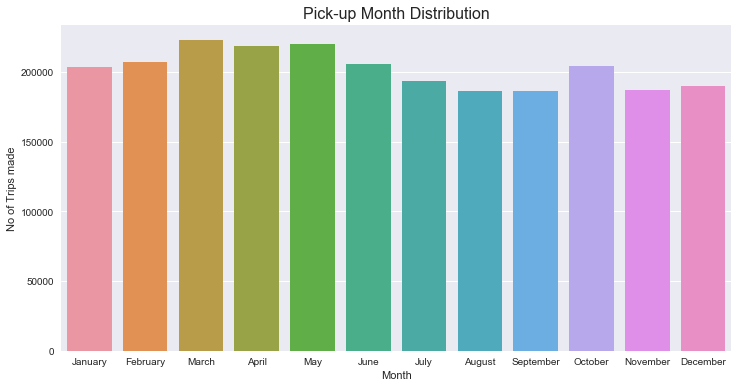

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(train['pickup_month'])
plt.title('Pick-up Month Distribution', fontsize=16)
plt.xlabel('Month')
plt.xticks(range(0,12), mm_names, rotation='horizontal')
plt.ylabel('No of Trips made')
plt.show()

### Plotting demand of trip according to hour in day

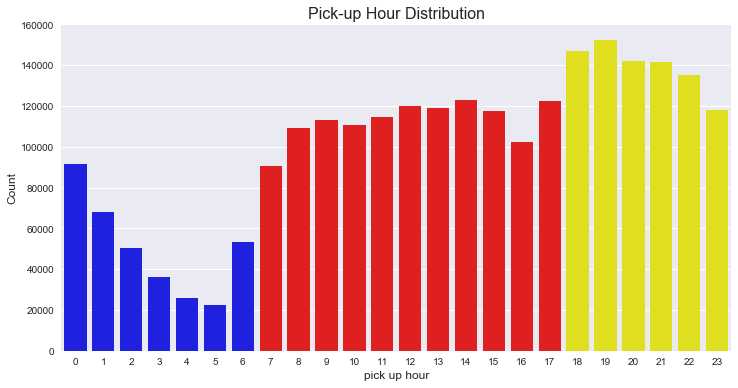

In [74]:
plt.figure(figsize=(12,6))
plt.grid('on')
label = np.arange(0,24)
clrs = ['blue' if (i < 7) else ('red' if (i < 18) else 'yellow') for i in label]
sns.countplot(x="pickup_hour", palette = clrs, data=train)
plt.title('Pick-up Hour Distribution', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('pick up hour', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()

In [75]:
gc.collect()

4618

### Plotting speed in different timeframe

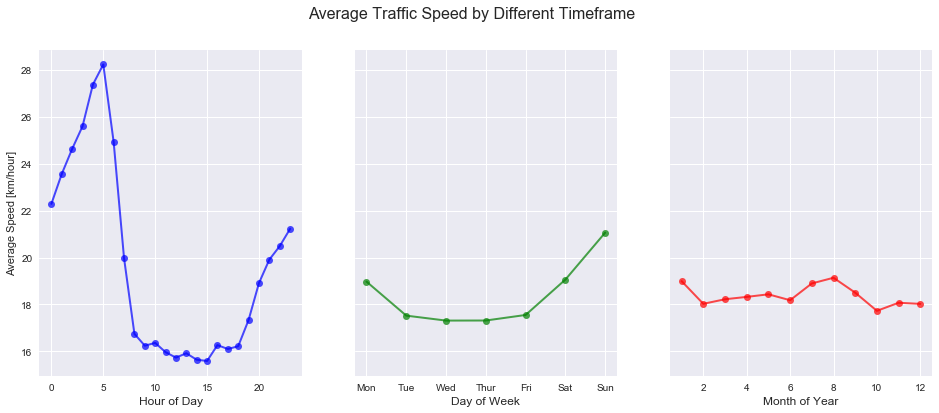

In [76]:
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(16,6))
ax[0].plot(train.groupby('pickup_hour')['speed_taximeter [km/hr]'].mean(), 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('pickup_day_week')['speed_taximeter [km/hr]'].mean(), 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('pickup_month')['speed_taximeter [km/hr]'].mean(), 'ro-', lw=2, alpha=0.7)

plt.sca(ax[1])
plt.xticks(range(0, 7), dow_names) #set name of label x 

ax[0].set_xlabel('Hour of Day',fontsize=12)
ax[1].set_xlabel('Day of Week',fontsize=12)
ax[2].set_xlabel('Month of Year',fontsize=12)
ax[0].set_ylabel('Average Speed [km/hour]')
fig.suptitle('Average Traffic Speed by Different Timeframe', fontsize=16)
plt.show()

# Heatmap by hour in December (10000 sample data)

In [77]:
from folium import plugins
from folium.plugins import HeatMap

newyork_on_heatmap = folium.Map(location=[40.730610, -73.935242], zoom_start=11.3)

heat = train[train['dropoff_month']==12].sample(n = 10000) # picking only December for sampling
#heat = train.sample(n = 10000)
heat = heat[['dropoff_latitude','dropoff_longitude','dropoff_month','dropoff_hour']]

# Ensure you're handing it floats
heat['dropoff_latitude'] = heat['dropoff_latitude'].astype(float)
heat['dropoff_longitude'] = heat['dropoff_longitude'].astype(float)

#remove NANs
heat = heat.dropna(axis=0)

# Create weight column, using month
#heat['weight'] = heat['dropoff_month']
heat['weight'] = heat['dropoff_hour']
heat['weight'] = heat['weight'].astype(float)
heat = heat.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'weight'])

# List comprehension to make list of list of list
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
         for index, row in heat[heat['weight'] == i].iterrows()] 
#            for i in range(1,13)]
             for i in range(0,24)]

# Plot it on the map
label = np.arange(0,24).tolist()
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8, index=label, radius=4)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

In [78]:
newyork_on_heatmap.save('heatmap.html')

# Examine Goldman Sachs employees working pattern

In [79]:
gs = train
gslongLim = [-74.015078, -74.013595] #0.001483
gslatLim  = [40.713849, 40.715446] # 0.001597

#gs = train[(train['pickup_longitude'] >= longLim[0]) & (train['pickup_longitude'] <= longLim[1])]
gs = gs[(gs['dropoff_longitude'] >= gslongLim[0]) & (gs['dropoff_longitude'] <= gslongLim[1])]
#gs = train[(train['pickup_latitude'] >= latLim[0]) & (train['pickup_latitude'] <= latLim[1])]
gs = gs[(train['dropoff_latitude'] >= gslatLim[0]) & (gs['dropoff_latitude'] <= gslatLim[1])]
gs = gs.reset_index(drop=True)

C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


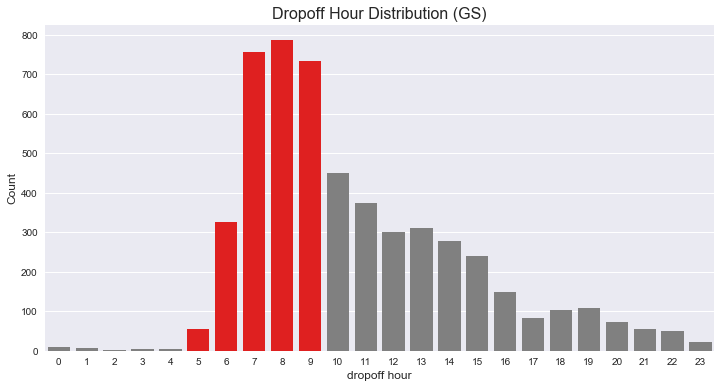

In [80]:
plt.figure(figsize=(12,6))
plt.grid('on')
label = np.arange(0,24)
clrs = ['grey' if (i < 5) else ('red' if (i < 10) else 'grey') for i in label]
sns.countplot(x="dropoff_hour", palette = clrs, data=gs)
plt.title('Dropoff Hour Distribution (GS)', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('dropoff hour', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()

In [81]:
gs_on_heatmap = folium.Map(location=[40.714636, -74.013971], zoom_start=18)

heat2 = gs[gs['dropoff_month']==12] # picking only December for sampling
#heat = train.sample(n = 10000)
heat2 = gs[['dropoff_latitude','dropoff_longitude','dropoff_month','dropoff_hour']]

# Ensure you're handing it floats
heat2['dropoff_latitude'] = heat2['dropoff_latitude'].astype(float)
heat2['dropoff_longitude'] = heat2['dropoff_longitude'].astype(float)

#remove NANs
heat2 = heat2.dropna(axis=0)

# Create weight column, using month
#heat['weight'] = heat['dropoff_month']
heat2['weight'] = heat2['dropoff_hour']
heat2['weight'] = heat2['weight'].astype(float)
heat2 = heat2.dropna(axis=0, subset=['dropoff_latitude','dropoff_longitude', 'weight'])

# List comprehension to make list of list of list
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
         for index, row in heat2[heat2['weight'] == i].iterrows()] 
#            for i in range(1,13)]
             for i in range(0,24)]

# Plot it on the map
label = np.arange(0,24).tolist()
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8, index=label, radius=4)
hm.add_to(gs_on_heatmap)

# Display the map
gs_on_heatmap

C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\edwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Calculate Distance Features

In [82]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [83]:
def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

In [84]:
from geopy import distance
train['haversine_dist']  = haversine_array(train['dropoff_latitude'].values, train['dropoff_longitude'].values, 
                                     train['pickup_latitude'].values, train['pickup_longitude'].values)

train['manhattan_dist'] = dummy_manhattan_distance(train['dropoff_latitude'].values, train['dropoff_longitude'].values, 
                                     train['pickup_latitude'].values, train['pickup_longitude'].values)

In [85]:
test['haversine_dist']  = haversine_array(test['dropoff_latitude'].values, test['dropoff_longitude'].values, 
                                     test['pickup_latitude'].values, test['pickup_longitude'].values)

test['manhattan_dist'] = dummy_manhattan_distance(test['dropoff_latitude'].values, test['dropoff_longitude'].values, 
                                     test['pickup_latitude'].values, test['pickup_longitude'].values)

# Using Kmean Clustering to create neighbourhoods

In [86]:
loc_df = pd.DataFrame()
loc_df['longitude'] = allLong
loc_df['latitude'] = allLat

In [87]:
plt.style.use('default')
%matplotlib inline

In [88]:
from sklearn.cluster import KMeans

In [89]:
# code for initiliazing Kmeans

"""
import time

start_time = time.time()


kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)

loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000) # using 200,000 sample for visualization
plt.figure(figsize = (10,10))
for label in loc_df['label'].unique():
    plt.plot(loc_df['longitude'][loc_df['label'] == label],loc_df['latitude'][loc_df['label'] == label],
             '.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York', fontsize=16)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))
"""

'\nimport time\n\nstart_time = time.time()\n\n\nkmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)\n\nloc_df[\'label\'] = kmeans.labels_\n\nloc_df = loc_df.sample(200000) # using 200,000 sample for visualization\nplt.figure(figsize = (10,10))\nfor label in loc_df[\'label\'].unique():\n    plt.plot(loc_df[\'longitude\'][loc_df[\'label\'] == label],loc_df[\'latitude\'][loc_df[\'label\'] == label],\n             \'.\', alpha = 0.3, markersize = 0.3)\n\nplt.title(\'Clusters of New York\', fontsize=16)\nplt.show()\n\nprint("--- %s seconds ---" % (time.time() - start_time))\n'

In [90]:
from sklearn.externals import joblib

#joblib.dump(kmeans, 'kmeans_clf2.pkl') 

In [91]:
kmeans = joblib.load('kmeans_clf2.pkl') # load pre trained model

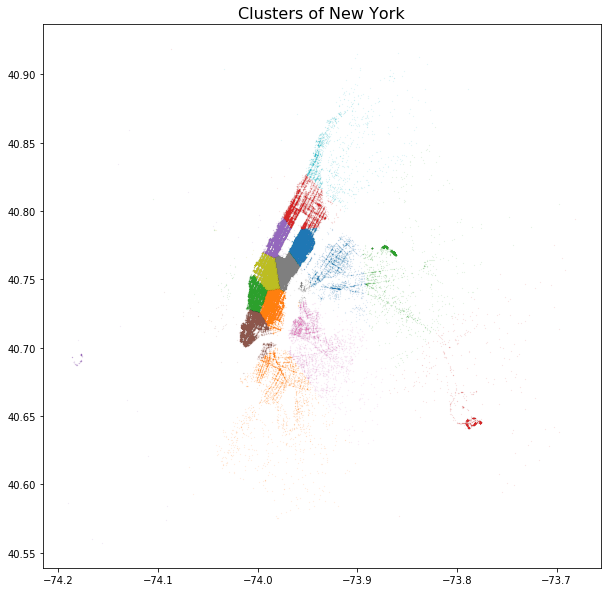

In [92]:
loc_df['label'] = kmeans.labels_

loc_df = loc_df.sample(200000) # using 200,000 sample for visualization
plt.figure(figsize = (10,10))
for label in loc_df['label'].unique():
    plt.plot(loc_df['longitude'][loc_df['label'] == label],loc_df['latitude'][loc_df['label'] == label],
             '.', alpha = 0.3, markersize = 0.3)

plt.title('Clusters of New York', fontsize=16)
plt.show()

In [93]:
kmeans.cluster_centers_[:,:]

array([[-74.0061486 ,  40.71481102],
       [-73.97330779,  40.75754026],
       [-73.94582635,  40.7064731 ],
       [-73.78576152,  40.65230821],
       [-73.9866246 ,  40.73171643],
       [-73.95614158,  40.77444149],
       [-73.98018844,  40.67379801],
       [-73.98022005,  40.77819614],
       [-73.98940332,  40.75381705],
       [-73.92733087,  40.8408682 ],
       [-73.95758832,  40.80013261],
       [-74.00176063,  40.73898192],
       [-73.86693938,  40.7642671 ],
       [-73.921345  ,  40.75671527],
       [-74.17291812,  40.68812458]])

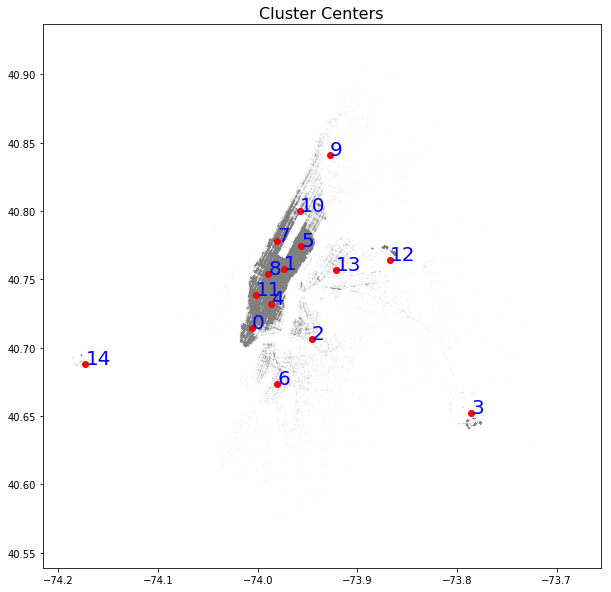

In [94]:
fig,ax = plt.subplots(figsize = (10,10))
for label in loc_df['label'].unique():
    ax.plot(loc_df['longitude'][loc_df['label'] == label],loc_df['latitude'][loc_df['label'] == label],
            '.', alpha = 0.4, markersize = 0.1, color = 'gray')
    ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r')
    ax.annotate(label, (kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1]), color = 'b', fontsize = 20)
ax.set_title('Cluster Centers', fontsize=16)
plt.show()


In [95]:
train['pickup_cluster'] = kmeans.predict(train[['pickup_longitude','pickup_latitude']])
train['dropoff_cluster'] = kmeans.predict(train[['dropoff_longitude','dropoff_latitude']])

test['pickup_cluster'] = kmeans.predict(test[['pickup_longitude','pickup_latitude']])
test['dropoff_cluster'] = kmeans.predict(test[['dropoff_longitude','dropoff_latitude']])

In [96]:
kmean15_train = pd.DataFrame()
kmean15_test = pd.DataFrame()

kmean15_train['pickup_cluster'] = train['pickup_cluster']
kmean15_train['dropoff_cluster'] = train['dropoff_cluster']

kmean15_test['pickup_cluster'] = test['pickup_cluster']
kmean15_test['dropoff_cluster'] = test['dropoff_cluster']

cluster_train = pd.get_dummies(kmean15_train, columns=['pickup_cluster','dropoff_cluster'])
cluster_test = pd.get_dummies(kmean15_test, columns=['pickup_cluster','dropoff_cluster'])

In [97]:
cluster_train.head(5)

,pickup_cluster_0,pickup_cluster_1,pickup_cluster_2,pickup_cluster_3,pickup_cluster_4,pickup_cluster_5,pickup_cluster_6,pickup_cluster_7,pickup_cluster_8,pickup_cluster_9,pickup_cluster_10,pickup_cluster_11,pickup_cluster_12,pickup_cluster_13,pickup_cluster_14,dropoff_cluster_0,dropoff_cluster_1,dropoff_cluster_2,dropoff_cluster_3,dropoff_cluster_4,dropoff_cluster_5,dropoff_cluster_6,dropoff_cluster_7,dropoff_cluster_8,dropoff_cluster_9,dropoff_cluster_10,dropoff_cluster_11,dropoff_cluster_12,dropoff_cluster_13,dropoff_cluster_14
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Creating Weekend Feature

In [98]:
dayinweek_train = pd.DataFrame()
dayinweek_train['pickup_day_week'] = train['pickup_day_week']
dayinweek_train = pd.get_dummies(dayinweek_train, columns=['pickup_day_week'])

dayinweek_test = pd.DataFrame()
dayinweek_test['pickup_day_week'] = test['pickup_day_week']
dayinweek_test = pd.get_dummies(dayinweek_test, columns=['pickup_day_week'])

In [99]:
month_train = pd.DataFrame()
month_train['pickup_month'] = train['pickup_month']
month_train = pd.get_dummies(month_train, columns=['pickup_month'])

month_test = pd.DataFrame()
month_test['pickup_month'] = test['pickup_month']
month_test = pd.get_dummies(month_test, columns=['pickup_month'])

In [100]:
def weekend(x):
    if (x == 5) or (x == 6):
        return 1
    else:
        return 0
train['weekend'] = train['pickup_day_week'].apply(weekend)
test['weekend'] = test['pickup_day_week'].apply(weekend)

# Combining Weather dataset

In [101]:
weather = pd.read_csv('Weather 2015.csv')

In [102]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
Date             365 non-null object
Maximum          365 non-null int64
Minimum          365 non-null int64
Average          365 non-null float64
Departure        365 non-null float64
HDD              365 non-null int64
CDD              365 non-null int64
Precipitation    365 non-null object
New Snow         365 non-null object
Snow Depth       365 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 28.6+ KB


In [103]:
weather.head(5)

,Date,Maximum,Minimum,Average,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,1/1/2015,39,27,33.000,-0.400,32,0,0,0,0
1,1/2/2015,42,35,38.500,5.200,26,0,0,0,0
2,1/3/2015,42,33,37.500,4.400,27,0,0.71,T,0
3,1/4/2015,56,41,48.500,15.500,16,0,0.3,0,0
4,1/5/2015,49,21,35.000,2.100,30,0,0,0,0


In [104]:
weather['Precipitation'] = weather['Precipitation'].apply(lambda x: 0 if x == 'T' else x)
weather['Snow Depth'] = weather['Snow Depth'].apply(lambda x: 0 if x == 'T' else x)
weather['Precipitation'] = weather['Precipitation'].astype('float64')
weather['Snow Depth'] = weather['Snow Depth'].astype('float64')

In [105]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['pickup_month'] = weather['Date'].dt.month
weather['pickup_day'] = weather['Date'].dt.day

In [106]:
weather = weather[['pickup_month','pickup_day','Average','Precipitation','Snow Depth']]
weather = weather.rename(columns = {'Average':'Avg Temp'})
weather.head(5)

,pickup_month,pickup_day,Avg Temp,Precipitation,Snow Depth
0,1,1,33.000,0.000,0.000
1,1,2,38.500,0.000,0.000
2,1,3,37.500,0.710,0.000
3,1,4,48.500,0.300,0.000
4,1,5,35.000,0.000,0.000


In [107]:
train = pd.merge(train, weather, on = ['pickup_month', 'pickup_day'], how = 'left')
test = pd.merge(test, weather, on = ['pickup_month', 'pickup_day'], how = 'left')

In [108]:
train.head(5)

,RateCodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,geo_dist,trip_duration,duration [min],speed_taximeter [miles/hr],speed_taximeter [km/hr],log_trip_duration,log_fare_amount,cost [mile],pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_weekofyear,pickup_day_week,pickup_time,dropoff_month,dropoff_hour,dropoff_day_week,haversine_dist,manhattan_dist,pickup_cluster,dropoff_cluster,weekend,Avg Temp,Precipitation,Snow Depth
0,1.000,2,40.756,-73.992,0.000,12.500,0.300,0.500,1,2,40.739,-73.977,N,0.000,0.000,13.300,2015-01-30 08:47:45,2015-01-30 08:29:43,1.840,1.361,1082.000,18.033,6.122,9.852,6.987,2.603,6.793,1,30,8,29,5,4,8.483,1,8,4,2.190,3.052,4,8,0,28.500,0.060,7.000
1,1.000,1,40.757,-73.970,1.000,14.500,0.300,0.500,1,2,40.781,-73.984,N,0.000,0.000,16.300,2015-01-20 16:22:23,2015-01-20 16:00:48,2.400,1.744,1295.000,21.583,6.672,10.737,7.167,2.741,6.042,1,20,16,0,4,1,16.000,1,16,1,2.808,3.691,7,1,0,36.000,0.000,0.000
2,1.000,1,40.773,-73.965,0.500,4.000,0.300,0.500,1,2,40.770,-73.958,N,0.000,0.000,5.300,2015-01-10 20:04:19,2015-01-10 20:01:33,0.500,0.426,166.000,2.767,10.843,17.451,5.118,1.609,8.000,1,10,20,1,2,5,20.017,1,20,5,0.684,0.892,5,5,1,19.500,0.000,1.000
3,1.000,1,40.837,-73.943,0.500,24.500,0.300,0.500,3,1,40.739,-74.000,N,5.200,0.000,31.000,2015-01-08 02:22:38,2015-01-08 02:01:12,8.000,7.405,1286.000,21.433,22.395,36.041,7.160,3.239,3.062,1,8,2,1,2,3,2.017,1,2,3,11.925,15.731,11,9,0,14.500,0.000,0.000
4,1.000,2,40.757,-73.928,0.500,17.000,0.300,0.500,1,1,40.752,-73.993,N,3.500,0.000,21.800,2015-01-18 00:31:17,2015-01-18 00:13:49,4.770,3.429,1048.000,17.467,16.385,26.370,6.956,2.890,3.564,1,18,0,13,3,6,0.217,1,0,6,5.504,6.003,8,13,1,36.500,2.100,0.000


### Creating variables and target for training model and make prediction

In [109]:
labels = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
          'geo_dist','manhattan_dist','haversine_dist',
           'pickup_time','weekend','Avg Temp','Precipitation','Snow Depth']

X  =  train.loc[:, labels]
X = pd.concat([X, cluster_train, dayinweek_train, month_train], axis =1) # combining two datasets
y = train['log_trip_duration']

X_test  =  test.loc[:, labels]
X_test = pd.concat([X_test, cluster_test, dayinweek_test, month_test], axis =1)
y_test = test['log_trip_duration']

In [110]:
X.columns

Index(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'geo_dist', 'manhattan_dist', 'haversine_dist',
       'pickup_time', 'weekend', 'Avg Temp', 'Precipitation', 'Snow Depth',
       'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2',
       'pickup_cluster_3', 'pickup_cluster_4', 'pickup_cluster_5',
       'pickup_cluster_6', 'pickup_cluster_7', 'pickup_cluster_8',
       'pickup_cluster_9', 'pickup_cluster_10', 'pickup_cluster_11',
       'pickup_cluster_12', 'pickup_cluster_13', 'pickup_cluster_14',
       'dropoff_cluster_0', 'dropoff_cluster_1', 'dropoff_cluster_2',
       'dropoff_cluster_3', 'dropoff_cluster_4', 'dropoff_cluster_5',
       'dropoff_cluster_6', 'dropoff_cluster_7', 'dropoff_cluster_8',
       'dropoff_cluster_9', 'dropoff_cluster_10', 'dropoff_cluster_11',
       'dropoff_cluster_12', 'dropoff_cluster_13', 'dropoff_cluster_14',
       'pickup_day_week_0', 'pickup_day_week_1', 'pickup_day_week_2',
       'pickup_da

In [111]:
X_test.columns

Index(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'geo_dist', 'manhattan_dist', 'haversine_dist',
       'pickup_time', 'weekend', 'Avg Temp', 'Precipitation', 'Snow Depth',
       'pickup_cluster_0', 'pickup_cluster_1', 'pickup_cluster_2',
       'pickup_cluster_3', 'pickup_cluster_4', 'pickup_cluster_5',
       'pickup_cluster_6', 'pickup_cluster_7', 'pickup_cluster_8',
       'pickup_cluster_9', 'pickup_cluster_10', 'pickup_cluster_11',
       'pickup_cluster_12', 'pickup_cluster_13', 'pickup_cluster_14',
       'dropoff_cluster_0', 'dropoff_cluster_1', 'dropoff_cluster_2',
       'dropoff_cluster_3', 'dropoff_cluster_4', 'dropoff_cluster_5',
       'dropoff_cluster_6', 'dropoff_cluster_7', 'dropoff_cluster_8',
       'dropoff_cluster_9', 'dropoff_cluster_10', 'dropoff_cluster_11',
       'dropoff_cluster_12', 'dropoff_cluster_13', 'dropoff_cluster_14',
       'pickup_day_week_0', 'pickup_day_week_1', 'pickup_day_week_2',
       'pickup_da

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [113]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(a - b) ** 2.0 for a, b in zip(y, y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [114]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [115]:
"""
gc.collect()

train2 = pd.concat([train, cluster_train, dayinweek_train, month_train], axis =1) # combining two datasets
train2 = train2.sample(frac=0.1)
X2  =  train2.loc[:, labels]
y2 = train2['log_trip_duration']



test2 = pd.concat([test, cluster_test, dayinweek_test, month_test], axis =1) # combining two datasets
test2 = test2.sample(frac=0.1)
X_test2 = test2.loc[:, labels]
y_test2 = test2['log_trip_duration']
"""

"\ngc.collect()\n\ntrain2 = pd.concat([train, cluster_train, dayinweek_train, month_train], axis =1) # combining two datasets\ntrain2 = train2.sample(frac=0.1)\nX2  =  train2.loc[:, labels]\ny2 = train2['log_trip_duration']\n\n\n\ntest2 = pd.concat([test, cluster_test, dayinweek_test, month_test], axis =1) # combining two datasets\ntest2 = test2.sample(frac=0.1)\nX_test2 = test2.loc[:, labels]\ny_test2 = test2['log_trip_duration']\n"

In [116]:
"""
gbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, max_depth=-1, 
                        n_estimators=5000, subsample_for_bin=200000, 
                        max_bin = 255,
                        bagging_fraction=0.8, bagging_freq=10)

gbm.get_params().keys()

param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [5000]
             }

grid_search = GridSearchCV(gbm, n_jobs=-1, param_grid=param_dist, cv = 3, verbose=5)
grid_search.fit(X2,y2)
grid_search.best_estimator_
"""

'\ngbm = lgb.LGBMRegressor(boosting_type=\'gbdt\', objective=\'regression\', num_leaves=31, max_depth=-1, \n                        n_estimators=5000, subsample_for_bin=200000, \n                        max_bin = 255,\n                        bagging_fraction=0.8, bagging_freq=10)\n\ngbm.get_params().keys()\n\nparam_dist = {"max_depth": [25,50, 75],\n              "learning_rate" : [0.01,0.05,0.1],\n              "num_leaves": [300,900,1200],\n              "n_estimators": [5000]\n             }\n\ngrid_search = GridSearchCV(gbm, n_jobs=-1, param_grid=param_dist, cv = 3, verbose=5)\ngrid_search.fit(X2,y2)\ngrid_search.best_estimator_\n'

# Predicting Trip Duration

In [117]:
# code to initialise lightgbm model

"""
gbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, max_depth=-1, 
                        learning_rate=0.4, n_estimators=5000, subsample_for_bin=200000, 
                        max_bin = 255,
                        bagging_fraction=0.8, bagging_freq=10)

gbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, eval_metric='mae')

"""

"\ngbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, max_depth=-1, \n                        learning_rate=0.4, n_estimators=5000, subsample_for_bin=200000, \n                        max_bin = 255,\n                        bagging_fraction=0.8, bagging_freq=10)\n\ngbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, eval_metric='mae')\n\n"

In [118]:
#joblib.dump(gbm, 'lightgbm_rgr.pkl') 
gbm = joblib.load('lightgbm_rgr.pkl') # loading pre trained model

In [119]:
import time

start_time = time.time()

gbm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
gbm_mae = rmsle(y_test, gbm_pred)
print(gbm_mae)

print("--- %s seconds ---" % (time.time() - start_time))

0.29959716139413317
--- 85.7471055984497 seconds ---


In [120]:
def reverse_log(x):
    pred = np.exp(x) - 1
    return pred

In [121]:
test['pred'] = reverse_log(gbm_pred)
test['pred [log]'] = gbm_pred
test['pred [min]'] = test['pred'] / 60.0

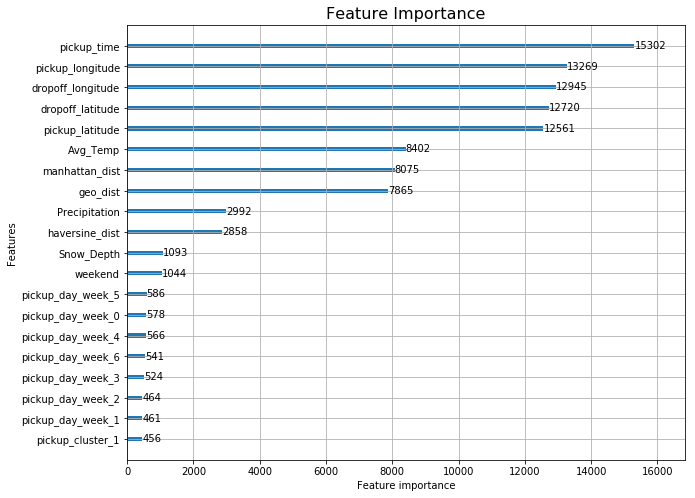

In [122]:
fig, ax = plt.subplots(figsize=(10,8))
lgb.plot_importance(gbm, max_num_features=20, ax=ax)
plt.title('Feature Importance', fontsize=16)
plt.show()

In [123]:
plot_df = test[['trip_duration','duration [min]','log_trip_duration','pred','pred [min]','pred [log]']]

In [124]:
plot_df.head(10)

,trip_duration,duration [min],log_trip_duration,pred,pred [min],pred [log]
0,225.000,3.750,5.421,239.961,3.999,5.485
1,613.000,10.217,6.420,706.034,11.767,6.561
2,1227.000,20.450,7.113,973.648,16.227,6.882
3,253.000,4.217,5.537,303.681,5.061,5.719
4,869.000,14.483,6.768,1137.439,18.957,7.037
5,271.000,4.517,5.606,284.171,4.736,5.653
6,203.000,3.383,5.318,201.457,3.358,5.311
7,2643.000,44.050,7.880,2763.336,46.056,7.925
8,827.000,13.783,6.719,765.879,12.765,6.642
9,1395.000,23.250,7.241,1258.427,20.974,7.138


In [125]:
plot_df = plot_df.sort_values('log_trip_duration').reset_index(drop=True)

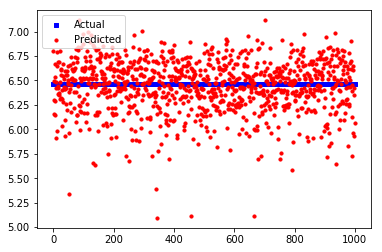

In [126]:
index_values=range(0,len(plot_df.iloc[600000:601000,2]))

fig = plt.figure()

plt.scatter(index_values, plot_df.iloc[600000:601000,2], s=10, c='b', marker="s", label='Actual')
plt.scatter(index_values, plot_df.iloc[600000:601000,5], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()

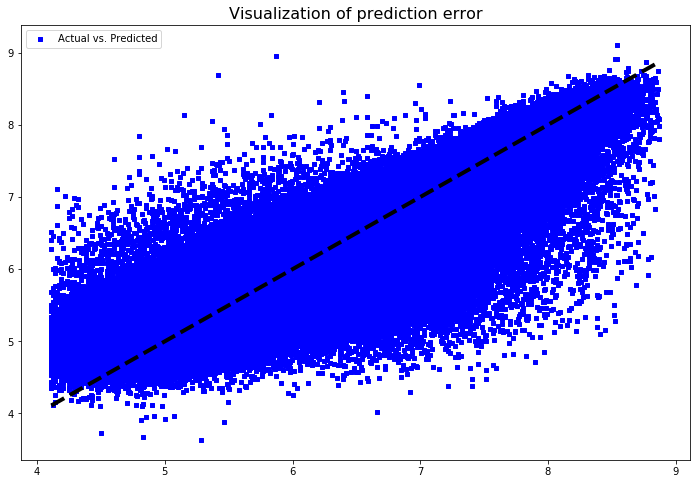

In [127]:
plt.figure(figsize=(12,8))

plt.scatter(plot_df.iloc[:,2], plot_df.iloc[:,5], s=10, c='b', marker="s", label='Actual vs. Predicted')
plt.plot([plot_df.iloc[:,2].min(), plot_df.iloc[:,2].max()], [plot_df.iloc[:,2].min(), plot_df.iloc[:,2].max()], 'k--', lw=4)
plt.legend(loc='upper left')
plt.title('Visualization of prediction error', fontsize=16)
plt.show()

In [128]:
gc.collect()

17533

# Predicting Fare amount

In [129]:
labels = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
          'geo_dist','manhattan_dist','haversine_dist',
           'pickup_time','weekend','Avg Temp','Precipitation','Snow Depth']

X  =  train.loc[:, labels]
X = pd.concat([X, cluster_train, dayinweek_train, month_train], axis =1) # combining two datasets
y = train['log_fare_amount']

X_test  =  test.loc[:, labels]
X_test = pd.concat([X_test, cluster_test, dayinweek_test, month_test], axis =1)
y_test = test['log_fare_amount']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)


In [130]:
"""
gbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, max_depth=-1, 
                        learning_rate=0.3, n_estimators=5000, subsample_for_bin=200000, 
                        max_bin = 255,
                        bagging_fraction=0.8, bagging_freq=10)

gbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, eval_metric='mae')
"""

"\ngbm = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31, max_depth=-1, \n                        learning_rate=0.3, n_estimators=5000, subsample_for_bin=200000, \n                        max_bin = 255,\n                        bagging_fraction=0.8, bagging_freq=10)\n\ngbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, eval_metric='mae')\n"

In [131]:
#joblib.dump(gbm, 'lightgbm_fare_rgr.pkl') 
gbm = joblib.load('lightgbm_fare_rgr.pkl') # loading pre trained model

In [132]:
start_time = time.time()

gbm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
gbm_mae = rmsle(y_test, gbm_pred)
print(gbm_mae)

print("--- %s seconds ---" % (time.time() - start_time))


0.1592068922931
--- 101.7803943157196 seconds ---


In [133]:
test['pred_fare'] = reverse_log(gbm_pred)
test['pred_fare [log]'] = gbm_pred

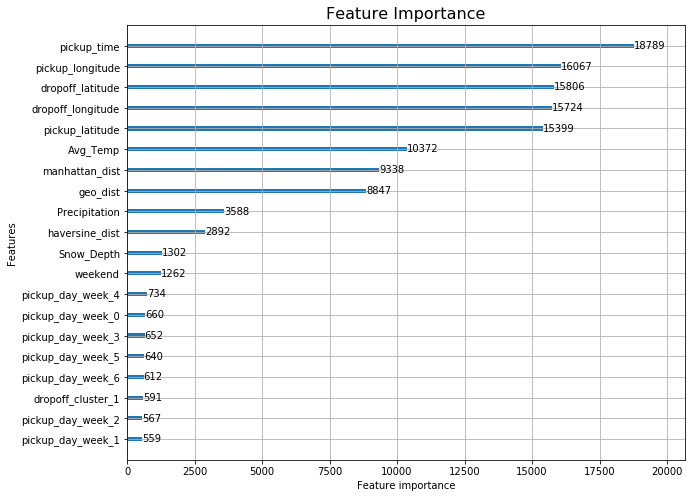

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
lgb.plot_importance(gbm, max_num_features=20, ax=ax)
plt.title('Feature Importance', fontsize=16)
plt.show()

In [135]:
test[['trip_duration','duration [min]','log_trip_duration','fare_amount','log_fare_amount',
      'pred','pred [min]','pred [log]','pred_fare','pred_fare [log]']].head(10)

,trip_duration,duration [min],log_trip_duration,fare_amount,log_fare_amount,pred,pred [min],pred [log],pred_fare,pred_fare [log]
0,225.000,3.750,5.421,5.000,1.792,239.961,3.999,5.485,4.701,1.741
1,613.000,10.217,6.420,12.500,2.603,706.034,11.767,6.561,13.381,2.666
2,1227.000,20.450,7.113,14.500,2.741,973.648,16.227,6.882,12.100,2.573
3,253.000,4.217,5.537,4.500,1.705,303.681,5.061,5.719,4.816,1.761
4,869.000,14.483,6.768,17.500,2.918,1137.439,18.957,7.037,20.196,3.054
5,271.000,4.517,5.606,5.000,1.792,284.171,4.736,5.653,5.344,1.847
6,203.000,3.383,5.318,4.500,1.705,201.457,3.358,5.311,4.835,1.764
7,2643.000,44.050,7.880,52.000,3.970,2763.336,46.056,7.925,52.461,3.979
8,827.000,13.783,6.719,10.500,2.442,765.879,12.765,6.642,9.565,2.358
9,1395.000,23.250,7.241,16.000,2.833,1258.427,20.974,7.138,14.827,2.762


In [163]:
test[['duration [min]','pred [min]']].sample(10).reset_index(drop=True)

,duration [min],pred [min]
0,32.733,37.283
1,3.183,3.619
2,10.900,10.642
3,7.400,9.835
4,2.350,3.545
5,7.417,5.251
6,3.317,4.096
7,22.983,19.184
8,11.050,12.450
9,5.083,3.698


In [158]:
"""
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, scoring = 'neg_mean_absolute_error', cv=5, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
"""

"\nfrom tpot import TPOTRegressor\n\ntpot = TPOTRegressor(generations=5, population_size=50, scoring = 'neg_mean_absolute_error', cv=5, verbosity=2)\ntpot.fit(X_train, y_train)\nprint(tpot.score(X_test, y_test))\n"

In [138]:
len(X.columns)

61

In [139]:
gc.collect()

7825

In [140]:
labels = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
          'geo_dist','manhattan_dist','haversine_dist',
           'pickup_time','weekend','Avg Temp','Precipitation','Snow Depth']

X  =  train.loc[:, labels]
X = pd.concat([X, cluster_train, dayinweek_train, month_train], axis =1) # combining two datasets
y = train['log_trip_duration']

X_test  =  test.loc[:, labels]
X_test = pd.concat([X_test, cluster_test, dayinweek_test, month_test], axis =1)
y_test = test['log_trip_duration']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# Deep learning model

In [141]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X_train)
#scalarY.fit(y_train.reshape(-1,1))

X_train = scalarX.transform(X_train)
#y_train = scalarY.transform(y_train.reshape(-1,1))

X_valid = scalarX.transform(X_valid)
#y_valid = scalarY.transform(y_valid.reshape(-1,1))

X_test = scalarX.transform(X_test)
#y_test = scalarY.transform(y_test.reshape(-1,1))



C:\Users\edwin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [142]:
import tensorflow as tf

In [143]:
# define and fit the final model
#with tf.device('/gpu:1'):

"""
model = Sequential()
model.add(Dense(61, input_dim=61, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, batch_size=50000, epochs=150, verbose=1, validation_data=(X_valid, y_valid))

"""


"\nmodel = Sequential()\nmodel.add(Dense(61, input_dim=61, activation='relu'))\nmodel.add(Dense(30, activation='relu'))\nmodel.add(Dense(1, activation='linear'))\nmodel.compile(loss='mse', optimizer='adam')\nmodel.fit(X_train, y_train, batch_size=50000, epochs=150, verbose=1, validation_data=(X_valid, y_valid))\n\n"

In [144]:
from keras.models import load_model

#model.save('keras_taxi.h5')  
model = load_model('keras_taxi.h5')

In [145]:
pred = model.predict(X_test)
#pred = scalarY.inverse_transform(pred)

In [146]:
for i in range(0,20):
    print("X=%s, Predicted=%s" % (y_test[i], pred[i]))

X=5.420534999272286, Predicted=[5.5983543]
X=6.419994928147142, Predicted=[6.7444434]
X=7.113142108707088, Predicted=[6.708138]
X=5.537334267018537, Predicted=[5.9774976]
X=6.76849321164863, Predicted=[6.8763866]
X=5.605802066295998, Predicted=[5.5560465]
X=5.318119993844216, Predicted=[5.7034154]
X=7.880048200971577, Predicted=[7.8609805]
X=6.71901315438526, Predicted=[6.4425955]
X=7.241366283322318, Predicted=[6.9458637]
X=6.2166061010848646, Predicted=[5.419448]
X=5.749392985908253, Predicted=[5.619687]
X=5.043425116919247, Predicted=[5.4101906]
X=6.78332520060396, Predicted=[6.8591948]
X=6.90875477931522, Predicted=[6.840919]
X=6.133398042996649, Predicted=[6.062553]
X=6.836259277277067, Predicted=[6.180169]
X=6.8501261661455, Predicted=[6.7042766]
X=7.027314514039777, Predicted=[7.133107]
X=6.295266001439646, Predicted=[6.8171916]


In [147]:
#y_test = scalarY.inverse_transform(y_test)

In [148]:
gbm_mae = rmsle(y_test, pred)
print(gbm_mae)

[0.37158415]


In [149]:
"""
from catboost import CatBoostRegressor

cat_features_index = [0,1,2,3,4,5,6]

model = CatBoostRegressor(iterations=5000, random_state = 0,  eval_metric='MAE',verbose=5, learning_rate=0.15)

# Fit model
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
        use_best_model=True, cat_features= cat_features_index)

cat_pred = model.predict(X_test)
"""

"\nfrom catboost import CatBoostRegressor\n\ncat_features_index = [0,1,2,3,4,5,6]\n\nmodel = CatBoostRegressor(iterations=5000, random_state = 0,  eval_metric='MAE',verbose=5, learning_rate=0.15)\n\n# Fit model\nmodel.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],\n        use_best_model=True, cat_features= cat_features_index)\n\ncat_pred = model.predict(X_test)\n"

In [150]:
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score

#kfold = KFold(n_splits=4, random_state=0)

#results = cross_val_score(gbm, X, y, scoring='neg_mean_absolute_error',cv=kfold)
#print('LightGBM: %.3f' % (abs(results.mean())))
    
#scores = cross_val_score(gbm, X, y, cv=shuffle_split)
#print("Cross-validation scores:\n{}".format(scores))
#print("Average cross-validation score:{:.2f}".format(scores.mean()))